In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
# Create a set of random latitude and longitude combinations.
lat = np.random.uniform(-90, 90, size = 1500)
lngs = np.random.uniform(-180, 180, size = 1500)
lat_lngs = zip(lat,lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
#Matching longitudes to cities
# Create a list for holding the cities. 
cities = []
# Identify the nearest city for each latitude and longitude combination. (Use citipy.nearestcity and city_name)
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
     # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
print(len(cities))


631


In [6]:
# Import the requests library.
import requests


from config import weather_api_key

In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?"
city_url = url + "appid=" + weather_api_key + "&q=" + city

In [8]:
city_url

'http://api.openweathermap.org/data/2.5/weather?appid=e01e178252e51b882e486f8fcb28d5a6&q=hauterive'

In [9]:
city_weather = requests.get(city_url).json()
city_weather

{'coord': {'lon': 3.4459, 'lat': 46.0901},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03n'}],
 'base': 'stations',
 'main': {'temp': 292.83,
  'feels_like': 292.81,
  'temp_min': 289.03,
  'temp_max': 293.57,
  'pressure': 1014,
  'humidity': 75,
  'sea_level': 1014,
  'grnd_level': 984},
 'visibility': 10000,
 'wind': {'speed': 2.19, 'deg': 179, 'gust': 4.33},
 'clouds': {'all': 27},
 'dt': 1631150724,
 'sys': {'type': 1,
  'id': 6496,
  'country': 'FR',
  'sunrise': 1631164619,
  'sunset': 1631211026},
 'timezone': 7200,
 'id': 3013748,
 'name': 'Hauterive',
 'cod': 200}

In [10]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
#     //city_url = url + "&q=" + city.replace(" ","+")
    city_url = url + "appid=" + weather_api_key + "&q=" + city.replace(" ", "+") 

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S') 

        # Append the City information into city_data list
        city_data.append({"City": city.title(), 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
    
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kapaa
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | bredy
Processing Record 4 of Set 1 | nanortalik
Processing Record 5 of Set 1 | kloulklubed
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | isla mujeres
Processing Record 8 of Set 1 | yaring
Processing Record 9 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 10 of Set 1 | punta de piedra
Processing Record 11 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | kaitangata
Processing Record 14 of Set 1 | port elizabeth
Processing Record 15 of Set 1 | lolua
City not found. Skipping...
Processing Record 16 of Set 1 | hilo
Processing Record 17 of Set 1 | tessalit
Processing Record 18 of Set 1 | bolungarvik
City not found. Skipping...
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | bregen

Processing Record 32 of Set 4 | cape town
Processing Record 33 of Set 4 | half moon bay
Processing Record 34 of Set 4 | puerto ayora
Processing Record 35 of Set 4 | moga
Processing Record 36 of Set 4 | kitimat
Processing Record 37 of Set 4 | port hardy
Processing Record 38 of Set 4 | bonthe
Processing Record 39 of Set 4 | tuatapere
Processing Record 40 of Set 4 | bethel
Processing Record 41 of Set 4 | lagoa
Processing Record 42 of Set 4 | port hedland
Processing Record 43 of Set 4 | mariahu
Processing Record 44 of Set 4 | kichera
Processing Record 45 of Set 4 | valparaiso
Processing Record 46 of Set 4 | san cristobal
Processing Record 47 of Set 4 | husavik
Processing Record 48 of Set 4 | ateli
Processing Record 49 of Set 4 | saint-donat-de-montcalm
Processing Record 50 of Set 4 | vostok
Processing Record 1 of Set 5 | manggar
Processing Record 2 of Set 5 | itaueira
Processing Record 3 of Set 5 | strezhevoy
Processing Record 4 of Set 5 | tura
Processing Record 5 of Set 5 | bandarbeyla
Pr

Processing Record 25 of Set 8 | ituni
City not found. Skipping...
Processing Record 26 of Set 8 | geraldton
Processing Record 27 of Set 8 | nishihara
Processing Record 28 of Set 8 | moranbah
Processing Record 29 of Set 8 | santa maria del oro
Processing Record 30 of Set 8 | qurayyat
Processing Record 31 of Set 8 | katherine
Processing Record 32 of Set 8 | butembo
Processing Record 33 of Set 8 | palana
Processing Record 34 of Set 8 | kudahuvadhoo
Processing Record 35 of Set 8 | maksatikha
Processing Record 36 of Set 8 | banda aceh
Processing Record 37 of Set 8 | athni
Processing Record 38 of Set 8 | port macquarie
Processing Record 39 of Set 8 | srivardhan
Processing Record 40 of Set 8 | palmer
Processing Record 41 of Set 8 | kalakamati
Processing Record 42 of Set 8 | lata
Processing Record 43 of Set 8 | mount isa
Processing Record 44 of Set 8 | necochea
Processing Record 45 of Set 8 | trelew
Processing Record 46 of Set 8 | matrei
City not found. Skipping...
Processing Record 47 of Set 

Processing Record 9 of Set 12 | deyang
Processing Record 10 of Set 12 | omsukchan
Processing Record 11 of Set 12 | cap malheureux
Processing Record 12 of Set 12 | san jeronimo
Processing Record 13 of Set 12 | dharchula
Processing Record 14 of Set 12 | minab
Processing Record 15 of Set 12 | punto fijo
Processing Record 16 of Set 12 | kisumu
Processing Record 17 of Set 12 | platteville
Processing Record 18 of Set 12 | troitsko-pechorsk
Processing Record 19 of Set 12 | asau
Processing Record 20 of Set 12 | richards bay
Processing Record 21 of Set 12 | hastings
Processing Record 22 of Set 12 | kunashak
Processing Record 23 of Set 12 | ilebo
Processing Record 24 of Set 12 | veraval
Processing Record 25 of Set 12 | leh
Processing Record 26 of Set 12 | pitimbu
Processing Record 27 of Set 12 | doaba
Processing Record 28 of Set 12 | yatou
Processing Record 29 of Set 12 | santo antonio do ica
Processing Record 30 of Set 12 | vredendal
Processing Record 31 of Set 12 | la seyne-sur-mer
Processing 

In [12]:
len(city_data)

575

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapaa,22.0752,-159.3190,302.33,66,20,1.34,US,2021-09-09 01:25:27
1,Busselton,-33.6500,115.3333,284.31,93,100,1.64,AU,2021-09-09 01:25:28
2,Bredy,52.4153,60.3411,282.57,80,95,5.18,RU,2021-09-09 01:25:28
3,Nanortalik,60.1432,-45.2371,280.28,93,18,2.65,GL,2021-09-09 01:25:28
4,Kloulklubed,7.0419,134.2556,302.43,74,100,3.91,PW,2021-09-09 01:25:29
5,Rikitea,-23.1203,-134.9692,296.23,79,94,7.91,PF,2021-09-09 01:25:29
6,Isla Mujeres,21.2311,-86.7310,302.18,84,87,4.18,MX,2021-09-09 01:25:29
7,Yaring,6.8662,101.3689,298.17,88,100,5.72,TH,2021-09-09 01:25:29
8,Punta De Piedra,7.6176,-71.4916,295.92,93,9,0.94,VE,2021-09-09 01:25:30
9,Albany,42.6001,-73.9662,294.08,94,100,3.77,US,2021-09-09 01:25:25


In [14]:
#Rearrange column order 
new_column_order = ["City", "Country","Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed" ]
city_data_df = city_data_df[new_column_order]
city_data_df.head(5)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kapaa,US,2021-09-09 01:25:27,22.0752,-159.3190,302.33,66,20,1.34
1,Busselton,AU,2021-09-09 01:25:28,-33.6500,115.3333,284.31,93,100,1.64
2,Bredy,RU,2021-09-09 01:25:28,52.4153,60.3411,282.57,80,95,5.18
3,Nanortalik,GL,2021-09-09 01:25:28,60.1432,-45.2371,280.28,93,18,2.65
4,Kloulklubed,PW,2021-09-09 01:25:29,7.0419,134.2556,302.43,74,100,3.91


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index = "City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

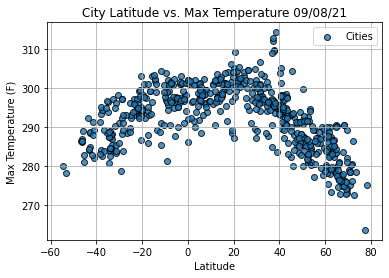

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

plt.legend()
plt.show()

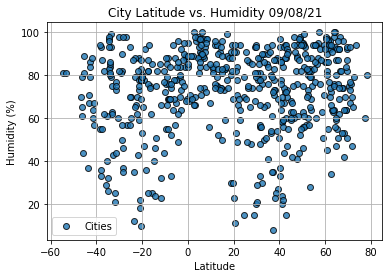

In [18]:

# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats, humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

plt.legend()
plt.show()

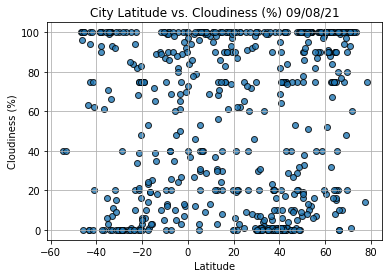

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

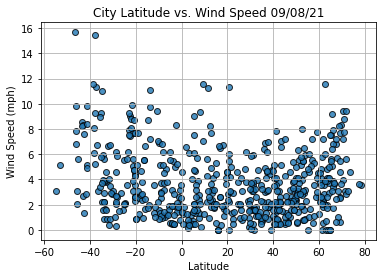

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()


In [21]:
# Import linregress
from scipy.stats import linregress 

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    
    print(f"the r value is: {r_value:.3f}")



In [22]:
index_13 = city_data_df.loc[13]
index_13

City                     Tessalit
Country                        ML
Date          2021-09-09 01:25:31
Lat                       20.1986
Lng                        1.0114
Max Temp                    305.1
Humidity                       23
Cloudiness                      0
Wind Speed                   2.88
Name: 13, dtype: object

In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>=0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"]<0)]

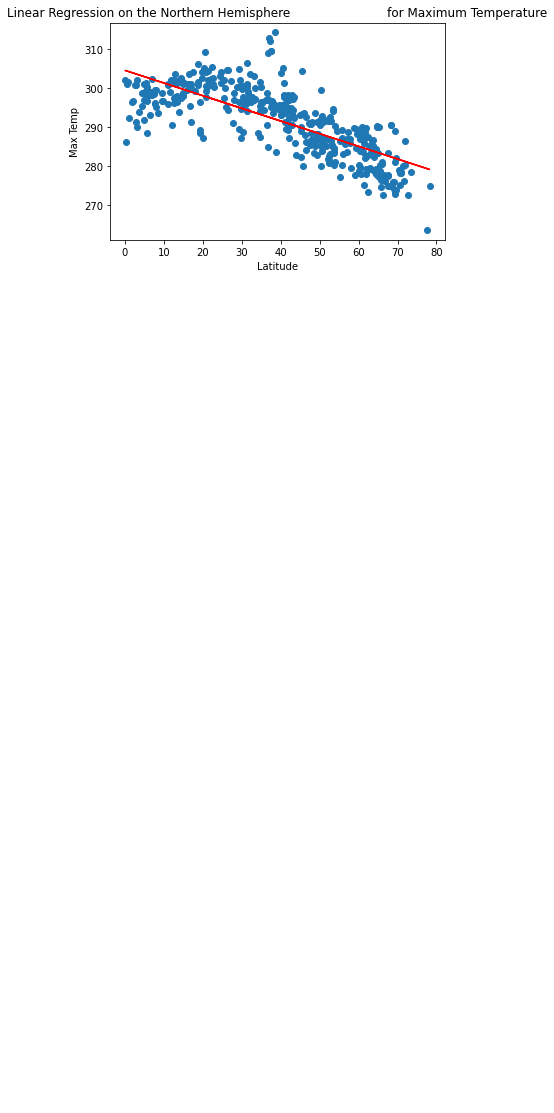

the r value is: -0.757


In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))



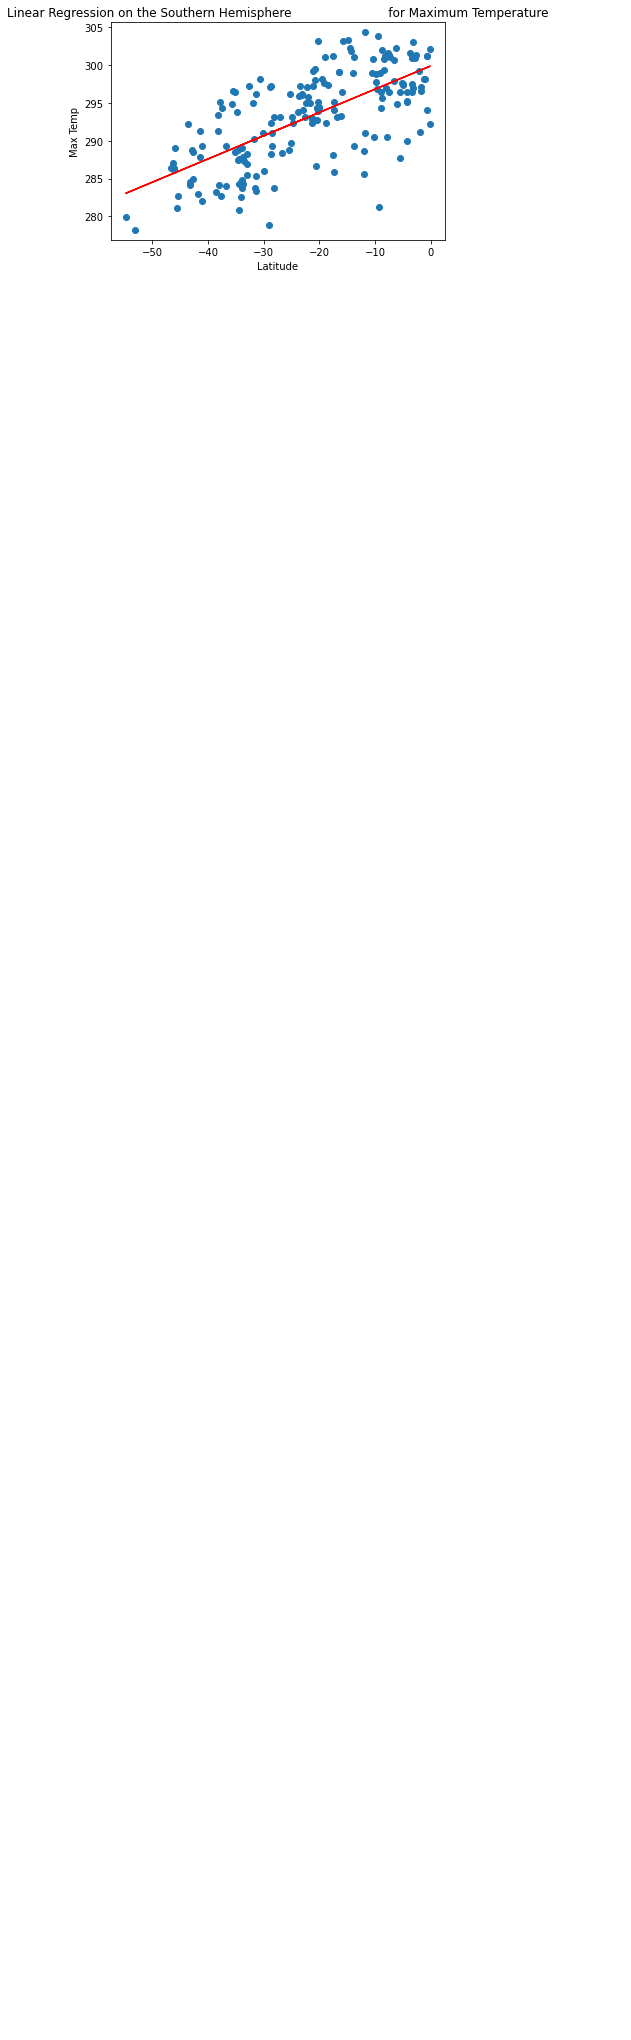

the r value is: 0.678


In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

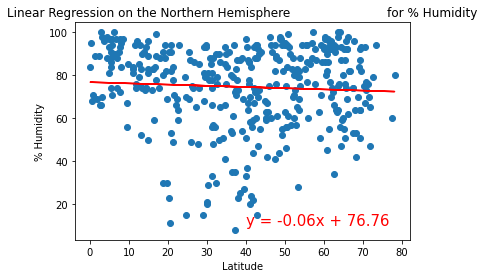

the r value is: -0.059


In [26]:
# Linear regression on the Northern Hemisphere (Humidity)
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))


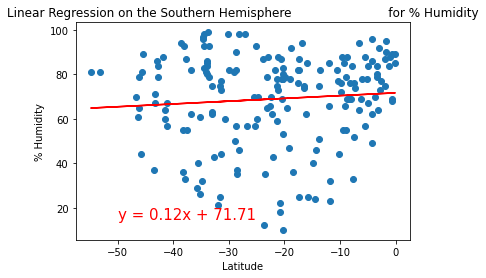

the r value is: 0.083


In [27]:
# Linear regression on the Southern Hemisphere (Humidity )
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))


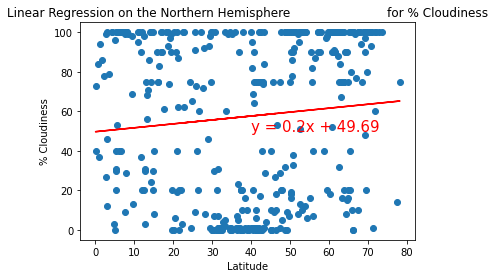

the r value is: 0.100


In [28]:
# Linear regression on the Northern Hemisphere (Cloudiness)
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,50))


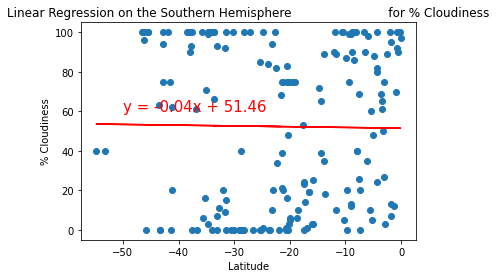

the r value is: -0.013


In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))


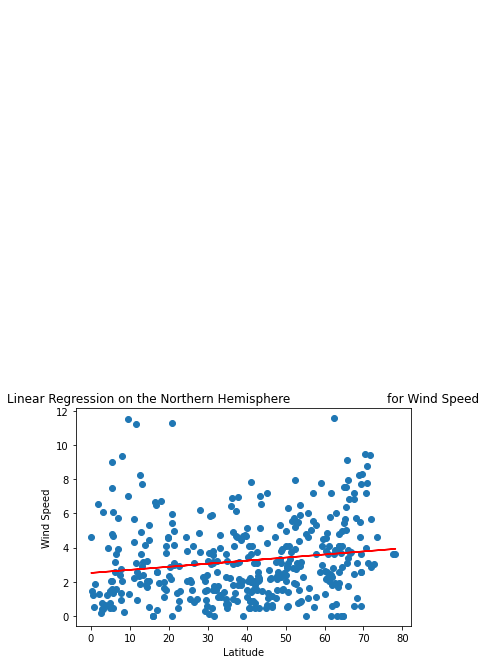

the r value is: 0.161


In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

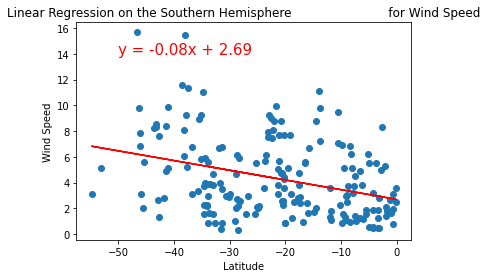

the r value is: -0.339


In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,14))
